In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

from IPython.display import Image
from IPython.display import display,Math,Latex
from IPython.display import HTML

In [2]:
from IPython.display import HTML
HTML('<iframe src=http://adsabs.harvard.edu/full/1995ApJS..101..309C width=1200 height=350></iframe>')

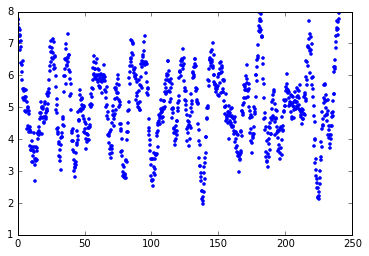

In [3]:
x_observe = np.linspace(0,240,1000)

A_k = np.array([0.8,0.75,0.5,0.4,0.85])
P_k = np.array([9.6,12.,18.,21.6,30.0])
phi_k = np.array([0.4,0.15,0.1,0.2,0.25])*2.0*np.pi
A0 = 5.0

def signal(A_k,P_k,phi_k,A0,x):
    
    y =np.zeros(np.size(x))

    for i in range(np.size(A_k)):
        y = y + A_k[i]*np.sin(x*np.pi*2.0/P_k[i]+phi_k[i])
        
    return y + A0

noise = np.random.normal(0.,1./np.sqrt(12.),np.size(x_observe))

y_observe = signal(A_k,P_k,phi_k,A0,x_observe) + noise

plt.plot(x_observe,y_observe,'.')
plt.show()

In [4]:
# Gaps creation with duration delta time = 24

index_list = np.where(np.round(x_observe/24.0) % 2 == 0)
x_gaps = np.delete(x_observe,index_list)
y_gaps = np.delete(y_observe,index_list)

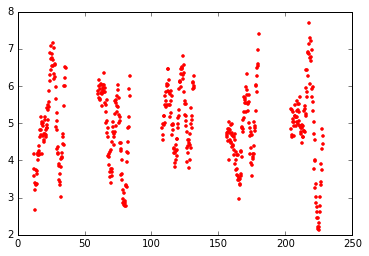

In [5]:
plt.plot(x_gaps,y_gaps,'r.')

In [6]:
from ffnet.pikaia import pikaia

def fitnes(x):
    
    A_k = x[:7]
    P_k = x[7:14]*100.0
    phi_k = x[14:21]
    A0 = x[21]*100.0
    
    y_model = signal(A_k,P_k,phi_k,A0,x_gaps)
    sigma = 1./np.sqrt(12.)
    
    fit_value = np.sum((y_model - y_gaps)**2/sigma)
    
    return 1./fit_value

ImportError: No module named 'ffnet'

In [87]:
n = 22
parameters = pikaia(fitnes, n, individuals=200, generations=400, digits=5, crossover=0.85, mutation=2, reproduction = 1, elitism = 1)

In [88]:
print parameters[7:14]*100.0

[ 21.23200035  19.52199936  28.99799919  17.86499977  11.98399925
   8.0369997   97.56999969]


In [89]:
print parameters[:7]

[ 0.52438998  0.25781     0.70704001  0.60110998  0.81967998  0.51852
  0.14714   ]


In [90]:
print parameters[21]

0.04965
